# Plot Millstone single azimuth scan

In [1]:
import madrigalWeb.madrigalWeb
import pylab
import matplotlib.cm
import numpy
import scipy.interpolate
import h5py
import datetime
import dateutil.parser
import calendar
import re
%matplotlib inline

In [2]:
#CHANGE ME
user_fullname = "Student Example"
user_email = "isr.summer.school@gmail.com"
user_affiliation = "ISR Summer School 2022"

maddat = madrigalWeb.madrigalWeb.MadrigalData('http://cedar.openmadrigal.org/')

In [3]:
# instrument codes for Millstone Hill
instcodes={'MHO':30}

In [4]:
# start time
st=datetime.datetime(2013, 3, 16, 0,0)
et=datetime.datetime(2013, 3, 19, 0,0)

expList = maddat.getExperiments(instcodes['MHO'], 
                                st.year, st.month, st.day, st.hour, st.minute, st.second, 
                                et.year, et.month, et.day, et.hour, et.minute, et.second)
for exp in expList:
    print(exp)

id: 100195498
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100195498
url: http://cedar.openmadrigal.org/madtoc/experiments5/2013/mlh/16mar13a
name: DICE Overflight
siteid: 10
sitename: CEDAR
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2013
startmonth: 3
startday: 16
starthour: 21
startmin: 23
startsec: 22
endyear: 2013
endmonth: 3
endday: 16
endhour: 22
endmin: 34
endsec: 25
isLocal: True
madrigalUrl: http://cedar.openmadrigal.org/
PI: Phil Erickson
PIEmail: perickson@haystack.mit.edu
uttimestamp: 1594078627
access: 2
Madrigal version: 3.2

id: 100195539
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100195539
url: http://cedar.openmadrigal.org/madtoc/experiments5/2013/mlh/15mar13
name: DICE Overflight
siteid: 10
sitename: CEDAR
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2013
startmonth: 3
startday: 15
starthour: 19
startmin: 42
startsec: 44
endyear: 2013
endmonth: 3
endday: 16
endhour: 0
endmin: 40
endsec: 

In [5]:
# select Van Allen Conjunction experiment (regular ion line parameters)
for thisExp in expList:
    if re.match(exp.name, 'Van Allen'):
        break
print('Selecting: %s' % (thisExp.name))

Selecting: Van Allen Conjunction


In [6]:
# survey all experiment files available
fileList = maddat.getExperimentFiles(thisExp.id)
thisFile=None
for file in fileList:
    print(file.kindatdesc)

Combined basic parameters file - all antennas and modes
Zenith single-pulse basic parameters
Zenith alternating-code basic parameters
MISA (steerable) single-pulse basic parameters
MISA (steerable) alternating-code basic parameters
Gridded data fitted to a uniform spatial and temporal grid - useful for modellers
Derived vector ion velocities


In [7]:
# Select the correct experiment file (MISA uncoded pulse)
fileList = maddat.getExperimentFiles(thisExp.id)
thisFile=None
for file in fileList:
    if re.match('MISA \(steerable\) single-pulse',file.kindatdesc):
        print('Using: %s' % (file))
        thisFile=file
        break

Using: name: /opt/cedar3/experiments5/2013/mlh/16mar13/mlh130316k.005.hdf5
kindat: 3430
kindatdesc: MISA (steerable) single-pulse basic parameters
category: 1
status: Final
permission: 0
expId: 100195503
doi: https://w3id.org/cedar?experiment_list=experiments5/2013/mlh/16mar13&file_list=mlh130316k.005.hdf5



In [8]:
# Download the file (should end up in this folder)       
filename=thisFile.name
outfilename=thisFile.name.split('/')[-1]
result = maddat.downloadFile(filename,outfilename, user_fullname, user_email, user_affiliation, 'hdf5')

In [9]:
# Load file and get data table
hz = h5py.File(outfilename,'r')
hztl = hz['Data']['Table Layout']

In [10]:
# Survey the radar pulse lengths in this experiment
print('Unique pulse lengths in sec: %s' % (list(set(hztl['pl']))))

Unique pulse lengths in sec: [0.002, 0.00048]


In [11]:
# List variables available
print(hztl.dtype)

[('year', '<f8'), ('month', '<f8'), ('day', '<f8'), ('hour', '<f8'), ('min', '<f8'), ('sec', '<f8'), ('recno', '<f8'), ('kindat', '<f8'), ('kinst', '<f8'), ('ut1_unix', '<f8'), ('ut2_unix', '<f8'), ('range', '<f8'), ('pl', '<f8'), ('mdtyp', '<f8'), ('az1', '<f8'), ('az2', '<f8'), ('el1', '<f8'), ('el2', '<f8'), ('systmp', '<f8'), ('pnrmd', '<f8'), ('power', '<f8'), ('pulf', '<f8'), ('dtau', '<f8'), ('ipp', '<f8'), ('tfreq', '<f8'), ('vtx', '<f8'), ('dvtx', '<f8'), ('scntyp', '<f8'), ('cycn', '<f8'), ('posn', '<f8'), ('mresl', '<f8'), ('sn', '<f8'), ('wchsq', '<f8'), ('gfit', '<f8'), ('fpi_dataqual', '<f8'), ('ti', '<f8'), ('dti', '<f8'), ('tr', '<f8'), ('dtr', '<f8'), ('popl', '<f8'), ('dpopl', '<f8'), ('ph+', '<f8'), ('dph+', '<f8'), ('fa', '<f8'), ('dfa', '<f8'), ('co', '<f8'), ('dco', '<f8'), ('pm', '<f8'), ('dpm', '<f8'), ('vo', '<f8'), ('dvo', '<f8'), ('vdopp', '<f8'), ('dvdopp', '<f8'), ('tibf', '<f8'), ('dtibf', '<f8'), ('trbf', '<f8'), ('dtrbf', '<f8'), ('fit_type', '<f8'), ('c

In [12]:
# antenna codes for Millstone Hill
antcodes={'Zenith':32,
           'MISA':31}

In [13]:
# Define time subset
t1 = calendar.timegm(dateutil.parser.parse('2013-03-17T19:41:00').timetuple())
t2 = calendar.timegm(dateutil.parser.parse('2013-03-17T19:57:00').timetuple())

In [14]:
# Select the 2000 usec uncoded pulse from the MISA at the desired times
indx = numpy.where(numpy.logical_and(hztl['pl'] >= 1900e-6,
                                    hztl['kinst'] == antcodes['MISA']))[0]
hztl = hztl[indx]
indx = numpy.where(numpy.logical_and(hztl['ut1_unix'] >= t1,
                                     hztl['ut2_unix'] <= t2))[0]
hztl = hztl[indx]

In [15]:
# Build a time array
ut = 0.5*(hztl['ut1_unix'] + hztl['ut2_unix'])
dut = numpy.array([datetime.datetime.utcfromtimestamp(uut) for uut in ut])

In [16]:
# Electron density:
# Construct X and Y meshgrid arrays for 2D plot and extract data for plotting
tcount = len(set(ut))
X = numpy.array(hztl['gdalt'])
X = X.reshape(tcount,-1)
Y = numpy.array(dut)
Y = Y.reshape(tcount,-1)

## Make scan plot. We need some helper functions.

In [17]:
def radarToGeodetic(az, el, rng, gdlatFn, gdlonFn, gdaltFn):
    ''' Given azimuth, elevation, and range, return geodetic latitude, longitude and altitude.
    The online Madrigal API MadrigalData.radarToGeodetic() could provide this but it is too
    slow to look up points individually; instead, use a predefined lookup table and interpolate
    within that table.
    Inputs:
        az - azimuth, deg
        el - elevation, deg
        rng - range, km
        gdlatFn - interpolator function to return latitude given az, el, range
        gdlonFn - interpolator function to return longitude given az, el, range
        gdaltFn - interpolator function to return altitude given az, el, range
    Returns:
        (gdlat, gdlon, gdalt) at the given (az, el, range) coordinates.
    Exceptions:
        Will throw an interpolation exception if the point is outside of the fixed lookup table.
    '''
    return gdlatFn(az,rng)[0][0], gdlonFn(az,rng)[0][0], gdaltFn(az,rng)[0][0]

In [18]:
def getAzScanWedge(rng, diffRng1, diffRng2, az1, az2, el1, el2, 
             gdlatFn, gdlonFn, gdaltFn, value):
    '''Calculate boundaries for data wedges needed in azimuth scan plotting on geographic coordinates.
    Inputs:
        rng - range of point, km
        diffRng1 - delta range offset for near edge of scan wedge, km
        diffRng2 - delta range offset for far edge of scan wedge, km
        az1 - azimuth of left edge of scan wedge, deg
        az2 - azimuth of right edge of scan wedge, deg
        el1 - elevation of left edge of scan wedge, deg
        el2 - elevation of right edge of scan wedge, deg
        gdlatFn - interpolator function to return latitude given az, el, range
        gdlonFn - interpolator function to return longitude given az, el, range
        gdaltFn - interpolator function to return altitude given az, el, range
        value - scalar value of data in wedge
    Returns:
        tuple with (value, p1, p2, p3, p4)
        p1 through p4 are four boundaries of wedge each given in (latitude, longitude)
    Exceptions:
        None
    '''
    point1_y, point1_x, gdalt = radarToGeodetic(az1, el1, rng-diffRng1, gdlatFn, gdlonFn, gdaltFn)
    point2_y, point2_x, gdalt = radarToGeodetic(az2, el1, rng-diffRng1, gdlatFn, gdlonFn, gdaltFn)
    point3_y, point3_x, gdalt = radarToGeodetic(az2, el1, rng+diffRng2, gdlatFn, gdlonFn, gdaltFn)
    point4_y, point4_x, gdalt = radarToGeodetic(az1, el1, rng+diffRng2, gdlatFn, gdlonFn, gdaltFn)
    return ((value, (point1_x, point1_y), (point2_x, point2_y), (point3_x, point3_y), (point4_x, point4_y)))

In [19]:
def generateWedges(data, gdlatFn, gdlonFn, gdaltFn):
    ''' generator function to iteratively return wedges in latitude/longitude coordinates.
    Inputs:
        data - array of data where columns are (range, az1, az2, el1, el2, value)
        gdlatFn - interpolator function to return latitude given az, el, range
        gdlonFn - interpolator function to return longitude given az, el, range
        gdaltFn - interpolator function to return altitude given az, el, range
    Returns:
        each call yields a wedge in format returned by getAzScanWedge():
            tuple with (value, p1, p2, p3, p4)
            p1 through p4 are four boundaries of wedge each given in (latitude, longitude)
    Exceptions:
        None
    '''
    # state variables
    lastAz1 = None
    lastAz2 = None
    lastEl1 = None
    lastEl2 = None
    lastRange = None
    lastDiffRangeLow = None
    lastValue = None

    for k in range(data.shape[0]):
        rng, az1, az2, el1, el2, value = data[k,:]
        if lastAz1 != None and ( abs(lastAz1-az1) > 0.001 or abs(lastEl1-el1) > 0.001 ):
            # new radar line found, send last point if needed
            if lastValue != None:
                dataWedge = getAzScanWedge(lastRange, lastDiffRangeLow, lastDiffRangeLow, 
                                           lastAz1, lastAz2, lastEl1, lastEl2, 
                                           gdlatFn, gdlonFn, gdaltFn,
                                           lastValue)
                yield(dataWedge)
            # this is the first point in the line, so no lastDiffRangeLow
            lastDiffRangeLow = None
        elif lastAz1 != None and ( abs(lastAz1-az1) < 0.001 and abs(lastEl1-el1) < 0.001 ):
            # continuing radar line
            if lastValue != None:
                lastDiffRangeLow = (rng - lastRange)/2.0
                dataWedge = getAzScanWedge(lastRange, lastDiffRangeLow, (rng-lastRange)/2.0, 
                                           lastAz1, lastAz2, lastEl1, lastEl2, 
                                           gdlatFn, gdlonFn, gdaltFn,
                                           lastValue)
                yield(dataWedge)
            else:
                lastDiffRangeLow = (rng - lastRange)/2.0

        # reset state variables
        lastAz1 = az1
        lastAz2 = az2
        lastEl1 = el1
        lastEl2 = el2
        lastRange = rng
        lastValue = value

    # finally, send last wedge if needed
    if lastValue != None:
        dataWedge = getAzScanWedge(lastRange, lastDiffRangeLow, lastDiffRangeLow, 
                                   lastAz1, lastAz2, lastEl1, lastEl2,
                                   gdlatFn, gdlonFn, gdaltFn, 
                                   lastValue)
        yield(dataWedge)

In [20]:
# Setup 2D interpolation using fixed Az/el/range to gdlat/gdlon/gdalt lookup table
geomtbl = numpy.loadtxt('mho_azscan_lookup_table.txt',skiprows=1)
az = list(set(geomtbl[:,0]))
az.sort()
rng = list(set(geomtbl[:,2]))
rng.sort()
gdlat = geomtbl[:,3]
gdlat.shape = (-1,len(rng))
gdlon = geomtbl[:,4]
gdlon.shape = (-1, len(rng))
gdalt = geomtbl[:,5]
gdalt.shape = (-1, len(rng))
gdlatFn = scipy.interpolate.RectBivariateSpline(az,rng,gdlat)
gdlonFn = scipy.interpolate.RectBivariateSpline(az,rng,gdlon)
gdaltFn = scipy.interpolate.RectBivariateSpline(az,rng,gdalt)

<b>NB:</b> Remember to re-execute <b> all </b> the blocks below this line if you change any code, such as
plotting a different scalar variable.  Generator patterns in python will not magically reset themselves in a notebook environment if you fail to follow this procedure.

In [21]:
# fill data block with radar coordinates and the desired scalar variable
datablock = numpy.empty((len(hztl),6))
datablock[:,0] = hztl['range']
datablock[:,1] = hztl['az1']
datablock[:,2] = hztl['az2']
datablock[:,3] = hztl['el1']
datablock[:,4] = hztl['el2']
# select electron density (can replace this
# with any other scalar - electron temperature, etc.)
datablock[:,5] = numpy.log10(hztl['ne'])
# instantiate a generator for this data block
datagen = generateWedges(datablock, gdlatFn, gdlonFn, gdaltFn)

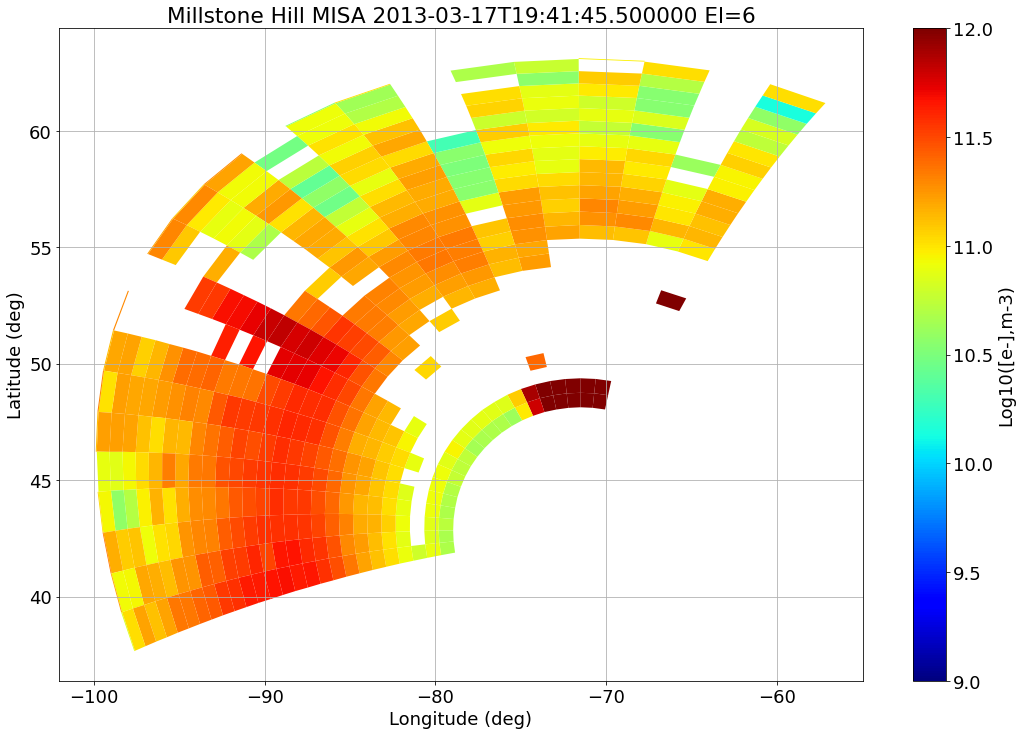

In [22]:
# create figure

pylab.rcParams['figure.figsize']=(18,12)
pylab.rcParams['font.size']=18
pylab.figure()

colorMap = matplotlib.cm.jet  # change as you'd like
minColormap = 9.0
maxColormap = 12.0

try:
    while True:
        data = next(datagen)
        x = [data[1][0], data[2][0], data[3][0], data[4][0]]
        y = [data[1][1], data[2][1], data[3][1], data[4][1]]
        dataRatio = (data[0] - minColormap) / (maxColormap - minColormap)
        colorStr = matplotlib.colors.rgb2hex(colorMap(dataRatio)[:3])
        if colorStr != '#000000': # don't plot out of bounds data
            pylab.fill(x,y,colorStr,edgecolor=None)
except StopIteration:
    # generator is out of data
    pass
pylab.xlabel('Longitude (deg)')
pylab.ylabel('Latitude (deg)')
pylab.title('Millstone Hill MISA %s El=%.0f' % (dut[0].isoformat(),
                                                hztl['el1'][0]))

pylab.grid()

# make a colorbar
scalableMappable = matplotlib.cm.ScalarMappable(cmap=colorMap)
scalableMappable.set_array(numpy.array([minColormap, maxColormap]))
scalableMappable.set_clim(minColormap, maxColormap)
scalableMappable.get_alpha = lambda x,y: 1.0
pylab.colorbar(mappable=scalableMappable, label='Log10([e-],m-3)')